## 1.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read from file
data_frame = pd.read_csv("../ProjectResources/movies/movies_metadata.csv", low_memory=False)

#create working copy
work_copy = data_frame.copy()
work_copy['budget'] = pd.to_numeric(work_copy['budget'], errors='coerce')

# clean the data
work_copy.dropna(axis='index', how='any', subset=['budget', 'vote_average', 'runtime', 'revenue'], inplace=True)
work_copy = work_copy[['budget', 'vote_average', 'runtime', 'revenue']]

# create a filter over budgets with 10,000
budget_gt_0 = work_copy.copy()
budget_gt_10k = work_copy['budget'] > 10_000

# create training and test sets
train_set, test_set = train_test_split(work_copy, test_size=0.2, random_state=777)
working_train = train_set.copy()
working_test = test_set.copy()

## 2.  
The initial features I'm choosing for the linear regression are Budget for X and Revenue for Y. I picked these due to their positive correlation found in part A, and because it kind of makes sense to try and predict revenue from budget.

## 3. 

In [46]:
# code referenced from class repo
from sklearn.linear_model import ElasticNet
l_reg = ElasticNet(alpha= 1, l1_ratio=.5)
x = working_train[budget_gt_10k][['budget']]
y = working_train[budget_gt_10k]['revenue']
l_reg.fit(x, y)

C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\1724187167.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = working_train[budget_gt_10k][['budget']]
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\1724187167.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = working_train[budget_gt_10k]['revenue']
C:\Users\s539593\Documents\School\DataScience\ds-venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+19, tolerance: 1.331e+16
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1)

In [47]:
# code copied from class repo
print("The bias is " , l_reg.intercept_)
print("The feature coefficients are ", l_reg.coef_)

The bias is  -9673473.20433496
The feature coefficients are  [2.97731863]


C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\685928760.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(working_train[budget_gt_10k]['budget'], working_train[budget_gt_10k]['revenue'])
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\685928760.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(working_train[budget_gt_10k]['budget'], working_train[budget_gt_10k]['revenue'])


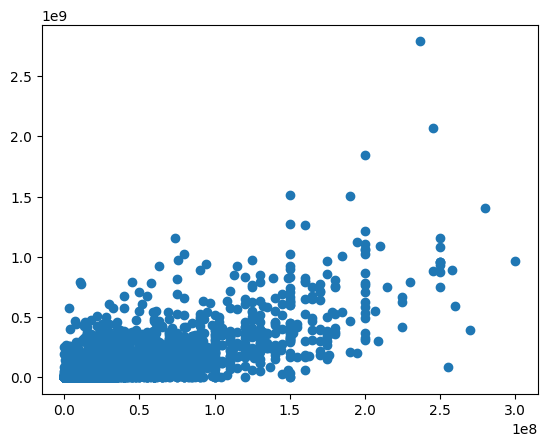

In [48]:
# code referenced from class repo
import matplotlib.pyplot as plt
plt.scatter(working_train[budget_gt_10k]['budget'], working_train[budget_gt_10k]['revenue'])
plt.show()

In [41]:
print(l_reg.score(x, y))

0.5449052590733374


In [49]:
# code coppied from class repo
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = l_reg.predict(x)
mse = mean_squared_error(y, y_pred)
print("mean squared error is ",  mse)

rmse = sqrt(mse)
print("The root mean squared error is ", rmse)

mean squared error is  8762057565868100.0
The root mean squared error is  93605862.88191621


## 4.
The accuracy of the model at this point appears to be around 54.5%. As I reduced the working set to not include budgets under 10k the accuracy of the model went down by 4-5%. I expected the relation to be stronger, but it still appears to be fairly strong.

## 5.

In [64]:
# check if another feature will improve results, "vote_average"
reg_plus_vote_average = ElasticNet()
x = working_train[budget_gt_10k][["budget", "vote_average"]]
y = working_train[budget_gt_10k]["revenue"]
reg_plus_vote_average.fit(x, y)

print(reg_plus_vote_average.score(x,y))
print("The bias is " , reg_plus_vote_average.intercept_)
print("The feature coefficients are ", reg_plus_vote_average.coef_)

0.5566273865842495
The bias is  -67307732.150994
The feature coefficients are  [2.94619138e+00 9.66962796e+06]


C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\93114221.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = working_train[budget_gt_10k][["budget", "vote_average"]]
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\93114221.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = working_train[budget_gt_10k]["revenue"]


In [65]:
# check if another feature will improve results, "runtime"
reg_plus_run = ElasticNet()
x = working_train[budget_gt_10k][["budget", "runtime"]]
y = working_train[budget_gt_10k]["revenue"]
reg_plus_run.fit(x, y)

print(reg_plus_run.score(x,y))
print("The bias is " , reg_plus_run.intercept_)
print("The feature coefficients are ", reg_plus_run.coef_)

0.5450843192771009
The bias is  -16829554.784677736
The feature coefficients are  [2.96508399e+00 7.01448916e+04]


C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\186452706.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = working_train[budget_gt_10k][["budget", "runtime"]]
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\186452706.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = working_train[budget_gt_10k]["revenue"]


In [66]:
# quadratic model
from sklearn.linear_model import LinearRegression
reg_plus_quad = LinearRegression()

X = working_train[budget_gt_10k][["budget"]]
Y = working_train[budget_gt_10k]["revenue"]

from sklearn.preprocessing import PolynomialFeatures
create_quad_terms = PolynomialFeatures(degree=2, include_bias=False)
X_quad_terms = create_quad_terms.fit_transform(X)
              
reg_plus_quad.fit(X_quad_terms, Y)
print(reg_plus_quad.score(X_quad_terms,Y))

0.5672128614967049


C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\3144914991.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = working_train[budget_gt_10k][["budget"]]
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\3144914991.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = working_train[budget_gt_10k]["revenue"]


In [68]:
# qubic model
reg_cube = LinearRegression()

X = working_train[budget_gt_10k][["budget"]]
Y = working_train[budget_gt_10k]["revenue"]

create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)
              
reg_cube.fit(X_cube_terms, Y)
print(reg_cube.score(X_cube_terms,Y))

0.5575873030964276


C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\875461787.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = working_train[budget_gt_10k][["budget"]]
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\875461787.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = working_train[budget_gt_10k]["revenue"]


Using a quadratic model I was able to improve the results by from 0.5449 to 0.5672. ~2.3%

## 6.

In [69]:
# cubic
X = working_test[budget_gt_10k][["budget"]]
Y = working_test[budget_gt_10k]["revenue"]

create_cube_terms = PolynomialFeatures(degree=3, include_bias=False)
X_cube_terms = create_cube_terms.fit_transform(X)

print(reg_cube.score(X_cube_terms, Y))

0.5428067215525971


C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\3248061468.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = working_test[budget_gt_10k][["budget"]]
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\3248061468.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = working_test[budget_gt_10k]["revenue"]


In [70]:
# original linear with ElasticNet
X = working_test[budget_gt_10k][["budget"]]
Y = working_test[budget_gt_10k]["revenue"]

print(l_reg.score(X, Y))

0.5461539398839348


C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\2058896971.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = working_test[budget_gt_10k][["budget"]]
C:\Users\s539593\AppData\Local\Temp\ipykernel_9400\2058896971.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = working_test[budget_gt_10k]["revenue"]
